In [1]:
# pip install mtcnn

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [3]:
# pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os, cv2

In [4]:
from PIL import Image

In [5]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt 
from PIL import Image , ImageDraw 
from sklearn.preprocessing import * 
import time 
import ast 
import os 
import tensorflow.keras as keras
import tensorflow as tf 
from tensorflow.keras import models, layers 
from tensorflow.keras import Input 
from tensorflow.keras.models import Model, load_model 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import optimizers, initializers, regularizers, metrics 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from tensorflow.keras.layers import BatchNormalization, Conv2D, Activation , AveragePooling2D , Input ,Dropout 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add, Flatten 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.metrics import top_k_categorical_accuracy 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping 
from tensorflow.python.keras.applications.inception_v3 import InceptionV3
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.keras.applications import vgg19, mobilenet_v2
from tqdm import tqdm 
import cv2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import itertools
from tensorflow.keras.optimizers import RMSprop

In [6]:
# pip install --upgrade google-cloud-storage

In [7]:
import tensorflow as tf 

In [9]:
tf.__version__

'2.6.0'

In [10]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [11]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2196136313292280929
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4024893440
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2473627640876988161
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [13]:
# pip install torchviz

In [13]:
torch.cuda.is_available()

True

In [9]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = 'C:/Users/master15/Desktop/0820Resnet/data_set/'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=5, shuffle=True, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=5, shuffle=True, num_workers=5)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 5153
테스트 데이터셋 크기: 1195
클래스: ['Heart', 'Oblong', 'Oval', 'Round', 'Square']


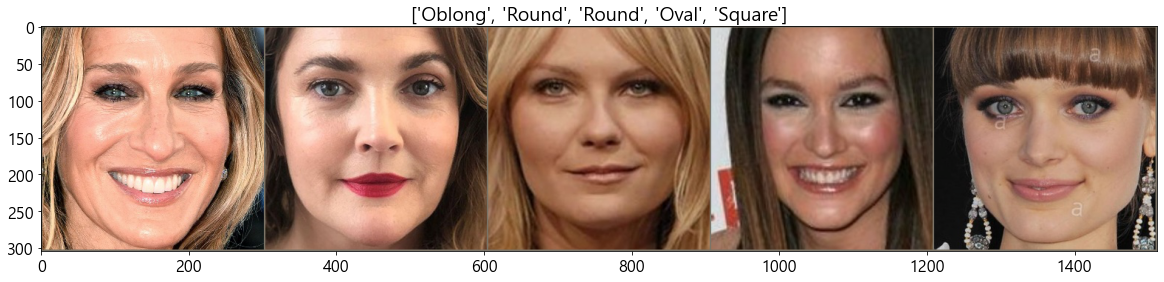

In [19]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [20]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 5개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 5)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [17]:
from torch.utils.tensorboard import SummaryWriter

In [18]:
# 기본 `log_dir` 은 "runs"이며, 여기서는 더 구체적으로 지정하였습니다
writer = SummaryWriter('C:/Users/master15/Desktop/0821Resnet/face_type_tensor')

In [19]:
# 이미지를 보여주기 위한 헬퍼(helper) 함수
# (아래 `plot_classes_preds` 함수에서 사용)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

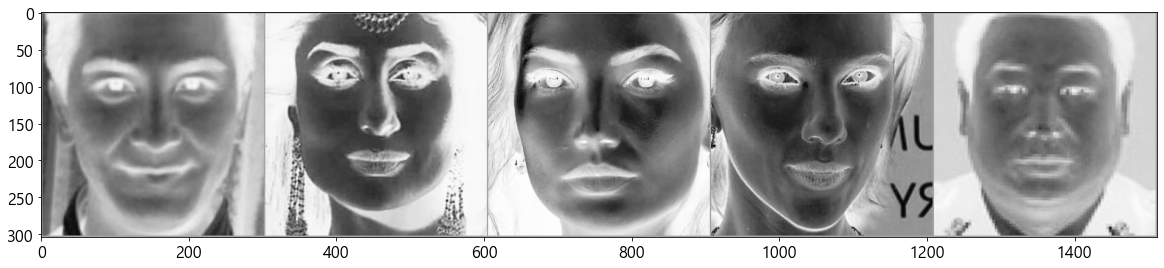

In [20]:
# 임의의 학습 이미지를 가져옵니다
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

# 이미지 그리드를 만듭니다.
img_grid = torchvision.utils.make_grid(images)

# 이미지를 보여줍니다.
matplotlib_imshow(img_grid, one_channel=True)

# tensorboard에 기록합니다.
writer.add_image('four_face_line_images', img_grid)

In [26]:
# writer.add_graph(model, images)
# writer.close()

In [25]:
tf.summary.FileWriter("C:/Users/master15/Desktop/0821Resnet/log/****")

AttributeError: module 'tensorboard.summary._tf.summary' has no attribute 'FileWriter'

In [21]:
import torch.nn.functional as F

In [22]:
# 헬퍼 함수

def images_to_probs(model, images):
    '''
    학습된 신경망과 이미지 목록으로부터 예측 결과 및 확률을 생성합니다
    '''
    output = model(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(model, images, labels):
    '''
    학습된 신경망과 배치로부터 가져온 이미지 / 라벨을 사용하여 matplotlib
    Figure를 생성합니다. 이는 신경망의 예측 결과 / 확률과 함께 정답을 보여주며,
    예측 결과가 맞았는지 여부에 따라 색을 다르게 표시합니다. "images_to_probs"
    함수를 사용합니다.
    '''
    preds, probs = images_to_probs(model, images)
    # 배치에서 이미지를 가져와 예측 결과 / 정답과 함께 표시(plot)합니다
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

In [ ]:
num_epochs = 50
model.train()
start_time = time.time()
# running_loss = 0.0

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for i , data in enumerate(train_dataloader,):
        inputs, labels= data
        
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        
        if i % 1000 == 999:    # 매 1000 미니배치마다...

            # ...학습 중 손실(running loss)을 기록하고
            writer.add_scalar('training loss',
                            running_loss / 100,
                            epoch * len(train_dataloader) + i)

            # ...무작위 미니배치(mini-batch)에 대한 모델의 예측 결과를 보여주도록
            # Matplotlib Figure를 기록합니다
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(model, inputs, labels),
                            global_step=epoch * len(train_dataloader) + i)
           

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

In [ ]:
# Save model for later use
#torch.save(model,'C:/Users/master15/Desktop/0812resnet/nose_classifier_model.h5')

In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

## 모델 전체 저장
- 모델 전체를 저장한다는 것의 의미는 모델 파라미터 뿐만 아니라, 옵티마이저(Optimizer), 에포크, 스코어 등 모든 상태를 저장한다는 것이다. 
- 만약 나중에 이어서 학습을 한다던지, 코드에 접근할 권한이 없는 사용자가 모델을 사용할 수 있도록 허락해주고 싶을 때 등의 경우에 사용하는 것이 바람직하다. 
- 모델 전체를 저장하는 만큼, 상대적으로 더 큰 용량을 가지게 된다.

## 모델의 state_dict만 저장
- Pytorch에서 모델의 state_dict은 학습가능한 매개변수가 담겨있는 딕셔너리(Dictionary)이다. 
- 가중치와 편향이 이에 해당한다. 
- 그러나 매개변수 이외에는 정보가 담겨있지 않기 때문에, 코드 상으로 모델이 구현되어 있는 경우에만 로드하는 방법을 통해 사용할 수 있다. 
- state_dict만 저장하면 파일의 용량이 가벼워진다는 장점이 있다.

In [ ]:
PATH = 'C:/Users/master15/Desktop/0821resnet/'

torch.save(model, PATH + 'model.pt')  # 전체 모델 저장
torch.save(model.state_dict(), PATH + 'model_state_dict.pt')  # 모델 객체의 state_dict 저장
torch.save({
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict()
}, PATH + 'all.tar') 

In [ ]:
end

## 모델 불러오기

In [ ]:
PATH = 'C:/Users/master15/Desktop/0812resnet/'

In [ ]:
# Load model
nose_model = torch.load(PATH + 'model.pt')

In [ ]:
nose_model.parameters

## 데이터 전처리

In [ ]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
new_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

data_dir = 'C:/Users/master15/Desktop/0812resnet/'

datasets = datasets.ImageFolder(os.path.join(data_dir, 'new_data'), new_transforms)

dataloader = torch.utils.data.DataLoader(datasets, batch_size=4, shuffle=True, num_workers=4)


## 불러온 이미지 보기

In [ ]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
 outputs = nose_model(inputs)

In [ ]:
 _, preds = torch.max(outputs, 1)

In [ ]:
print(''.join('{}\t'.format(str(preds[j].numpy()))for j in range(4))) 

In [ ]:
# 한 배치의 첫 번째 이미지에 대하여 결과 시각화
print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

In [ ]:
nose_model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = nose_model(inputs) # load한 모델 사용
        _, preds = torch.max(outputs, 1) # 예측 값중에 하나만 가져온다.
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

In [ ]:
nose_model.eval()
start_time = time.time()
total=0

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = nose_model(inputs) # load한 모델 사용
        _, preds = torch.max(outputs, 1) # 예측 값중에 하나만 가져온다.
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total+=labels.size(0)

print(100*running_corrects/ total)
       

## accurcy

In [ ]:
correct= 0
total=0

with torch.no_grad():
    for data in dataloader:
        inputs,labels = data
        outputs = nose_model(inputs) # load한 모델 사용
        _, preds = torch.max(outputs, 1) # 예측 값중에 하나만 가져온다.
        total+=labels.size(0)
        correct+= (preds==labels).sum().item()

print(100*correct/ total)
       